In [1]:
import sys
sys.path.append("/Users/coffee/Documents/code/QkidsAutomation")
from schedule.LSTM import LongShortTermMemory
import pandas as pd
import datetime
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
def show_history(history, epochs):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs-1)

    plt.figure(figsize=(16, 8))
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(epochs_range, loss[1:],'bo', label='Training Loss')
    ax1.plot(epochs_range, val_loss[1:],'r', label='Validation Loss')
    ax1.legend(loc='upper right')
    ax1.set_title('Training and Validation Loss')

    plt.show()
    
def show_predict(predict, actual):
    plt.figure(1, figsize=(16, 8))
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(range(len(predict)), predict,'bo', label='predict')
    ax1.plot(range(len(predict)), actual,'r', label='actual')
    ax1.legend(loc='upper right')
    ax1.set_title('predict and actual')

In [69]:
def show_history(history, epochs):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    head = 2
    epochs_range = range(epochs-head)
    plt.figure(figsize=(20, 8))
    ax1 = plt.subplot(1, 3, 1)
    ax1.plot(epochs_range, loss[head:],'bo', label='Training Loss')
    ax1.plot(epochs_range, val_loss[head:],'r', label='Validation Loss')
    ax1.legend(loc='upper right')
    ax1.set_title('Training and Validation Loss')
    

    ax2 = plt.subplot(1, 3, 2)
    ax2.plot(epochs_range, history.history['student_loss'][head:],'bo', label='Training Loss')
    ax2.plot(epochs_range, history.history['val_student_loss'][head:],'r', label='Validation Loss')
    ax2.legend(loc='upper right')
    ax2.set_title('student Training and Validation Loss')
    
    ax3 = plt.subplot(1, 3, 3)
    ax3.plot(epochs_range, history.history['teacher_loss'][head:],'bo', label='Training Loss')
    ax3.plot(epochs_range, history.history['val_teacher_loss'][head:],'r', label='Validation Loss')
    ax3.legend(loc='upper right')
    ax3.set_title('teacher Training and Validation Loss')

    plt.show()
    
def show_predict(predict, actual):
    plt.figure(1, figsize=(16, 8))
    length = range(len(actual[0]))
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(length, predict[0],'bo', label='predict')
    ax1.plot(length, actual[0],'r', label='actual')
    ax1.legend(loc='upper right')
    ax1.set_title('student predict and actual')
    
    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(length, predict[1],'bo', label='predict')
    ax2.plot(length, actual[1],'r', label='actual')
    ax2.legend(loc='upper right')
    ax2.set_title('teacher predict and actual')

In [3]:
lstm = LongShortTermMemory()
lstm.preprocess()

In [60]:
minmax = MinMaxScaler().fit_transform(student_cnt_by_date_cumsum.values)
minmax_users = pd.Series(minmax[:, 0], index = student_cnt_by_date_cumsum.index )
lstm.data['student_cnt'] = [ minmax_users[i.strftime("%Y-%m-%d")] for i in lstm.data.index] 

In [4]:
(train, train_student, train_teacher), (valid, valid_stduent, valid_teacher) = lstm.all()

In [6]:
lookback = 2

In [61]:
data_input = keras.Input(shape=(lookback, 384), name='input')
# layer = keras.layers.LSTM(16, activation='relu',return_sequences=True,dropout=0.5, recurrent_dropout = 0.5)(data_input)
layer = keras.layers.LSTM(32, activation='relu', return_sequences=False,dropout=0.25, recurrent_dropout = 0.25)(data_input)
student_predict_layer = keras.layers.Dense(units=1, name = 'student')(layer)
teacher_predict_layer = keras.layers.Dense(units=1, name = 'teacher')(layer)

In [62]:
api_model = keras.models.Model(data_input, [student_predict_layer, teacher_predict_layer])
api_model.compile(optimizer=keras.optimizers.RMSprop(),
             loss=['mae', 'mae'])

In [63]:
epochs = 1000

In [64]:
history = api_model.fit(train,[train_student, train_teacher],
                        validation_data = (valid, [valid_stduent,valid_teacher]),
                        epochs=epochs, verbose=0)

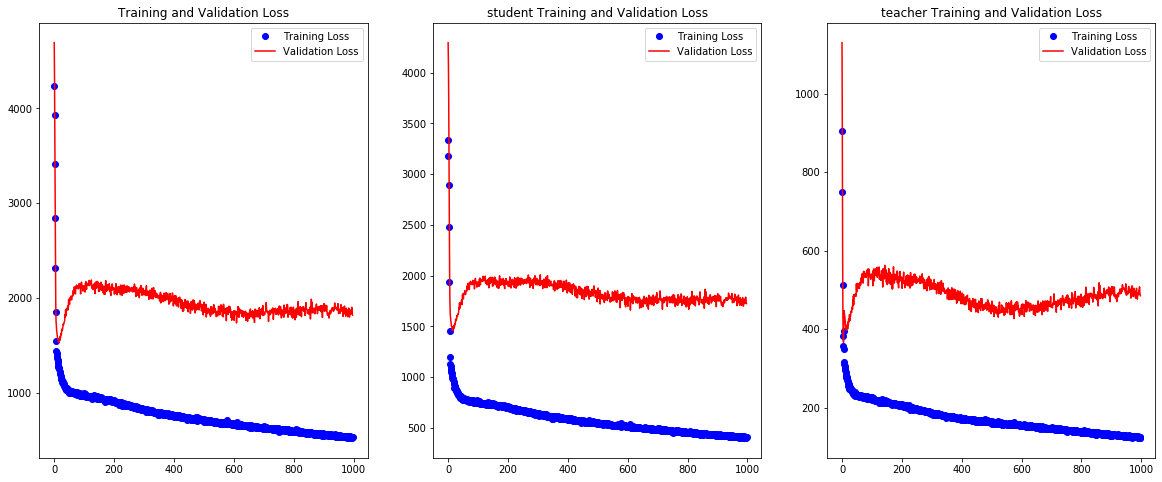

In [70]:
show_history(history, epochs)

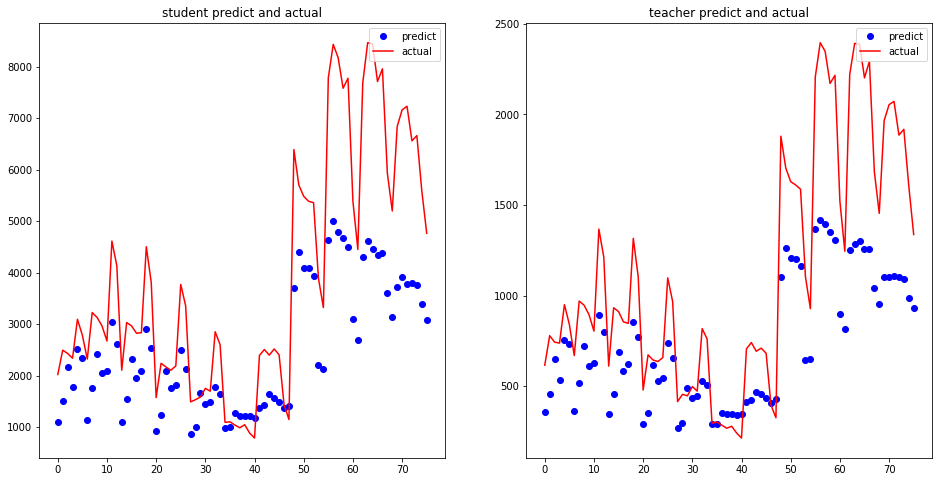

In [66]:
predict = api_model.predict(valid)
show_predict(predict, [valid_stduent,valid_teacher] )

In [7]:
model_GRU = keras.Sequential([
    keras.layers.GRU(32, input_shape=(lookback, 384),return_sequences=True),
    keras.layers.GRU(64, activation='relu', return_sequences=False),
    keras.layers.Dense(1)
])

In [8]:
model_GRU.compile(optimizer=keras.optimizers.RMSprop(),
             loss='mae')

In [15]:
history = model_GRU.fit(train,train_student,
                        validation_data = (valid, valid_stduent),
                        epochs=200, verbose=0)

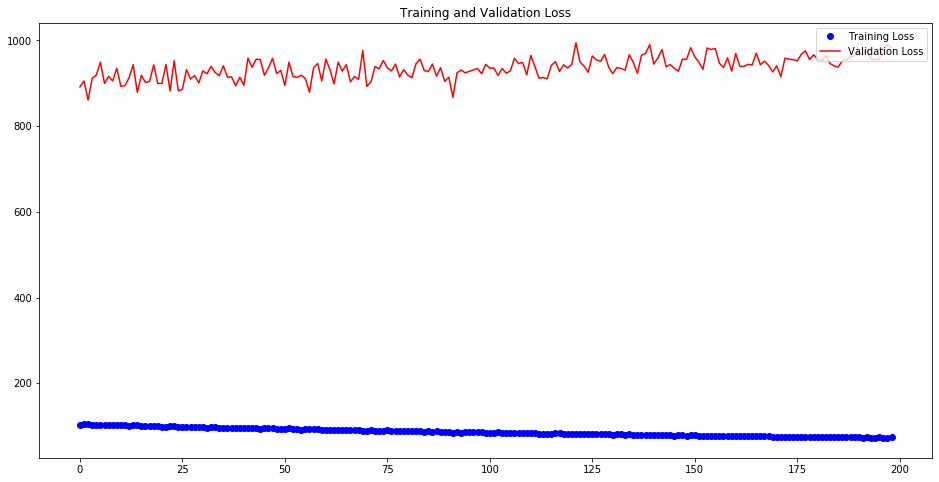

In [16]:
show_history(history, 200)

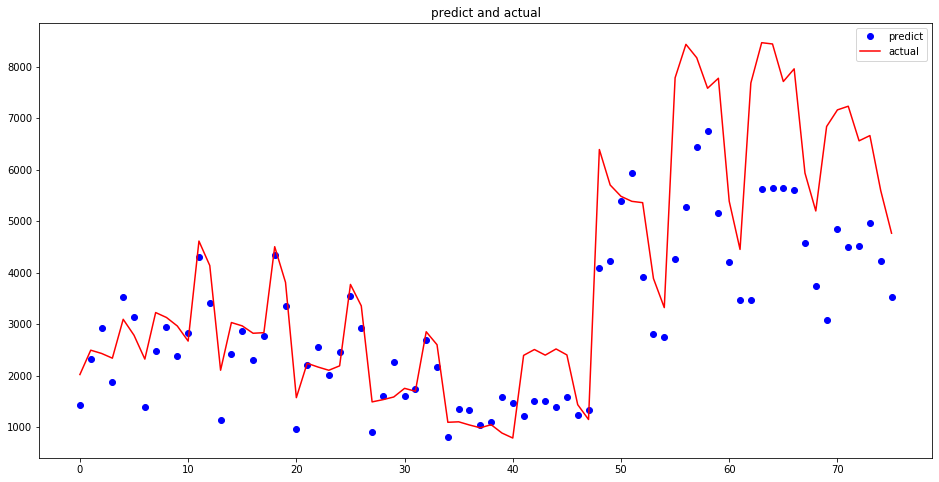

In [17]:
predict = model_GRU.predict(valid)
show_predict(predict, valid_stduent)